In [ ]:
import pandas as pd
# Load the dataset
data = pd.read_csv('/generated_dataset.csv')
print(data.head())
print(data.info())
print(data.describe())


   ID  Monthly Spending (INR)  Monthly Income (INR)  Monthly Savings (INR)
0   1                   11267                 15400                   4133
1   2                   14591                 15100                    509
2   3                   14747                 15400                    653
3   4                   10541                 15600                   5059
4   5                   11169                 13100                   1931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   ID                      1423 non-null   int64
 1   Monthly Spending (INR)  1423 non-null   int64
 2   Monthly Income (INR)    1423 non-null   int64
 3   Monthly Savings (INR)   1423 non-null   int64
dtypes: int64(4)
memory usage: 44.6 KB
None
                ID  Monthly Spending (INR)  Monthly Income (INR)  \
count  1423.000000        

In [ ]:
# Feature engineering: Creating a new feature representing the ratio of monthly spending to monthly income
data['Spending to Income Ratio'] = data['Monthly Spending (INR)'] / data['Monthly Income (INR)']
print(data.head())


   ID  Monthly Spending (INR)  Monthly Income (INR)  Monthly Savings (INR)  \
0   1                   11267                 15400                   4133   
1   2                   14591                 15100                    509   
2   3                   14747                 15400                    653   
3   4                   10541                 15600                   5059   
4   5                   11169                 13100                   1931   

   Spending to Income Ratio  
0                  0.731623  
1                  0.966291  
2                  0.957597  
3                  0.675705  
4                  0.852595  


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Split the dataset into features and target variable
X = data[['Monthly Spending (INR)', 'Monthly Income (INR)', 'Spending to Income Ratio']]
y = data['Monthly Savings (INR)']

# Testing and training and shi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definin hyperparameters for fine tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Instantiating the Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search cross-validation for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np

# Define mean squared error as the evaluation metric
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Evaluatign the model using cross-validation
rf_model_best = RandomForestRegressor(**best_params, random_state=42)
cv_scores = cross_val_score(rf_model_best, X_train, y_train, cv=5, scoring=scorer)
cv_rmse = np.sqrt(-cv_scores)
print("Cross-Validation RMSE:", cv_rmse)
print("Mean CV RMSE:", np.mean(cv_rmse))

# Fit the model on the entire training data with the best hyperparameters
rf_model_best.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model_best.predict(X_test)

# Evaluate the model on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)


Cross-Validation RMSE: [282.22177064 209.08478632 258.2413954  240.42522514 397.01062187]
Mean CV RMSE: 277.39675987276667
Test RMSE: 234.14529879164363


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = rf_model_best.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Predict monthly expenses and savings based on a custom monthly income
monthly_income = 15000  # Example monthly income to test / predict for
predicted_savings = rf_model_best.predict([[0, monthly_income, 0]])  # Assuming monthly spending is 0 for simplicity
predicted_expenses = monthly_income - predicted_savings

print("Predicted Monthly Expenses (INR):", predicted_expenses[0])
print("Predicted Monthly Savings (INR):", predicted_savings[0])


Mean Absolute Error: 59.704508771929824
Mean Squared Error: 54824.020946228076
R-squared: 0.9905090782501902
Predicted Monthly Expenses (INR): 2507.74
Predicted Monthly Savings (INR): 12492.26


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


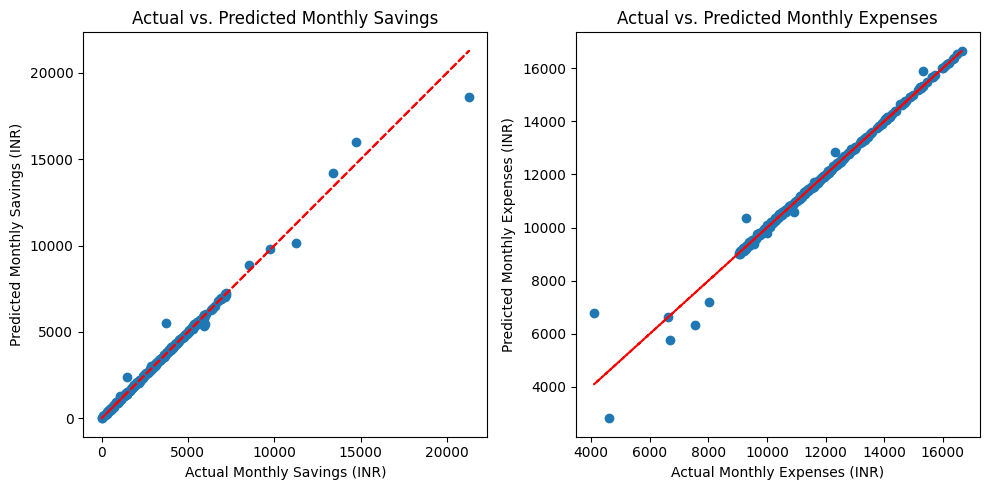

In [ ]:
# Plot actual vs. predicted values for monthly savings
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Actual Monthly Savings (INR)')
plt.ylabel('Predicted Monthly Savings (INR)')
plt.title('Actual vs. Predicted Monthly Savings')

# Plot actual vs. predicted values for monthly expenses
actual_expenses = X_test['Monthly Income (INR)'] - y_test
predicted_expenses = X_test['Monthly Income (INR)'] - y_pred

plt.subplot(1, 2, 2)
plt.scatter(actual_expenses, predicted_expenses)
plt.plot(actual_expenses, actual_expenses, color='red', linestyle='--')
plt.xlabel('Actual Monthly Expenses (INR)')
plt.ylabel('Predicted Monthly Expenses (INR)')
plt.title('Actual vs. Predicted Monthly Expenses')

plt.tight_layout()
plt.show()
